<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S6: Análisis y visualización de texto

## Objetivo

El objetivo de este challenge es a construir un análisis de opiniones con un dataset que contiene:

* Opiniones con contenido positivo
* Opiniones con contenido negativo

Para ello vamos a utilizar un dataset, o corpus, de texto. Constuiremos nuestro WordCloud con estos datos preprocesando el texto previamente.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

## Carga de datos

En este caso las reviews etiquetadas se encuentran en un fichero txt (`reviews.txt`) que contiene una línea por cada review y tiene la siguiente estructura `(0|1)<TABULADOR>texto`:

In [2]:
reviews_pos = []
reviews_neg = []

with open('reviews.txt', 'r', encoding='utf-8') as file:
    for line in file:
        trozos = line.split('\t')
        
        if trozos[0] == '0':
            # Negativos
            reviews_neg.append(trozos[1].lower())
        elif trozos[0] == '1':
            # Positivos
            reviews_pos.append(trozos[1].lower())

In [3]:
print(reviews_pos[0:5])

['the da vinci code book is just awesome.\n', "this was the first clive cussler i've ever read, but even books like relic, and da vinci code were more plausible than this.\n", 'i liked the da vinci code a lot.\n', 'i liked the da vinci code a lot.\n', "i liked the da vinci code but it ultimatly didn't seem to hold it's own.\n"]


In [4]:
print(reviews_pos[0:5])

['the da vinci code book is just awesome.\n', "this was the first clive cussler i've ever read, but even books like relic, and da vinci code were more plausible than this.\n", 'i liked the da vinci code a lot.\n', 'i liked the da vinci code a lot.\n', "i liked the da vinci code but it ultimatly didn't seem to hold it's own.\n"]


## Limpieza de signos
La primera función a implementar una función que nos filtre las reviews completas sin signos de puntuación:

In [5]:
def filtrar_review(review):
    review_limpia = review
    '''
    Filtra un review devolviendo una review "limpio"
    '''
    # IMPLEMENTA AQUÍ TU CÓDIGO
    separadores = [",", ".", ";", ":", "?", "¿", "!", "¡","(",")","-","--","[","]",">","<", "\n"]

    for separador in separadores:
        review_limpia = review_limpia.replace(separador,"")
    
    return review_limpia

In [6]:
reviews_pos_filtradas = [filtrar_review(x) for x in reviews_pos]
print(reviews_pos_filtradas[0:5])

['the da vinci code book is just awesome', "this was the first clive cussler i've ever read but even books like relic and da vinci code were more plausible than this", 'i liked the da vinci code a lot', 'i liked the da vinci code a lot', "i liked the da vinci code but it ultimatly didn't seem to hold it's own"]


In [7]:
reviews_neg_filtradas = [filtrar_review(x) for x in reviews_neg]
print(reviews_neg_filtradas[0:5])

['da vinci code was a terrible movie', 'then again the da vinci code is super shitty movie and it made like 700 million', 'the da vinci code comes out tomorrow which sucks', 'i thought the da vinci code movie was really boring', "god yahoo games has this trulyawful looking da vinci codethemed skin on it's chessboard right now"]


## Obtención de palabras
El siguiente paso de nuestro pipeline es convertir las reviews en palabras separadas:

In [8]:
def obtener_palabras(review):
    '''
    Realiza la separación en palabras de un review devolviendo una lista de palabras.
    '''
    # IMPLEMENTA AQUÍ TU CÓDIGO
    palabras_review = word_tokenize(review)
    return palabras_review

In [9]:
palabras_positivas = []
for t in reviews_pos_filtradas:
    palabras_positivas.extend(obtener_palabras(t))
    
print("palabras_positivas: " + str(len(palabras_positivas)))
print(palabras_positivas[0:50])

palabras_positivas: 42759
['the', 'da', 'vinci', 'code', 'book', 'is', 'just', 'awesome', 'this', 'was', 'the', 'first', 'clive', 'cussler', 'i', "'ve", 'ever', 'read', 'but', 'even', 'books', 'like', 'relic', 'and', 'da', 'vinci', 'code', 'were', 'more', 'plausible', 'than', 'this', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked']


In [10]:
palabras_negativas = []
for t in reviews_neg_filtradas:
    palabras_negativas.extend(obtener_palabras(t))
    
print("palabras_negativas: " + str(len(palabras_negativas)))
print(palabras_negativas[0:50])

palabras_negativas: 35278
['da', 'vinci', 'code', 'was', 'a', 'terrible', 'movie', 'then', 'again', 'the', 'da', 'vinci', 'code', 'is', 'super', 'shitty', 'movie', 'and', 'it', 'made', 'like', '700', 'million', 'the', 'da', 'vinci', 'code', 'comes', 'out', 'tomorrow', 'which', 'sucks', 'i', 'thought', 'the', 'da', 'vinci', 'code', 'movie', 'was', 'really', 'boring', 'god', 'yahoo', 'games', 'has', 'this', 'trulyawful', 'looking', 'da']


In [11]:
fdist = FreqDist(palabras_positivas)
fdist.most_common(10)

[('i', 3255),
 ('the', 1836),
 ('love', 1534),
 ('awesome', 1124),
 ('potter', 1086),
 ('harry', 1085),
 ('vinci', 1000),
 ('da', 999),
 ('brokeback', 999),
 ('impossible', 998)]

In [12]:
fdist = FreqDist(palabras_negativas)
fdist.most_common(10)

[('i', 1452),
 ('the', 1385),
 ('and', 1195),
 ('potter', 1007),
 ('harry', 1003),
 ('vinci', 1001),
 ('mountain', 1000),
 ('da', 999),
 ('code', 998),
 ('brokeback', 997)]

## Filtrar palabras
Una vez obtenidas las palabras debemos filtrar todas las palabras que no aporte información relevante al resultado. Acuérdate de filtrar también los signos de puntuación que puedan haber:

In [13]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# Después de haber repasado el eliminado de stopwords, hemos decidido añadir más.
signos_stopwords=[
    "�","\n","#","&","*","/","@","',","=","+","£","~","``","_","\x92"]
stopwords.extend(signos_stopwords)

In [15]:
def filtrar_palabras(palabras):
    ''' 
    Elimina de la lista de entrada las palabras no deseadas
    Devuelve una lista de palabras filtradas.
    '''
    out = []
    for p in palabras:
        if p in stopwords:
            pass
        elif len(p) < 3: # eliminamos también palabras muy cortas
            pass
        else:
            out.append(p)

    return out

In [16]:
palabras_positivas_filtradas = filtrar_palabras(palabras_positivas)

print("palabras_positivas_filtradas: " + str(len(palabras_positivas_filtradas)))
print(palabras_positivas_filtradas[0:50])

palabras_positivas_filtradas: 24108
['vinci', 'code', 'book', 'awesome', 'first', 'clive', 'cussler', "'ve", 'ever', 'read', 'even', 'books', 'like', 'relic', 'vinci', 'code', 'plausible', 'liked', 'vinci', 'code', 'lot', 'liked', 'vinci', 'code', 'lot', 'liked', 'vinci', 'code', 'ultimatly', "n't", 'seem', 'hold', 'even', 'exaggeration', 'midnight', 'went', 'walmart', 'buy', 'vinci', 'code', 'amazing', 'course', 'loved', 'vinci', 'code', 'want', 'something', 'better', 'different', 'thought']


In [17]:
palabras_negativas_filtradas = filtrar_palabras(palabras_negativas)

print("palabras_negativas_filtradas: " + str(len(palabras_negativas_filtradas)))
print(palabras_negativas_filtradas[0:50])

palabras_negativas_filtradas: 20160
['vinci', 'code', 'terrible', 'movie', 'vinci', 'code', 'super', 'shitty', 'movie', 'made', 'like', '700', 'million', 'vinci', 'code', 'comes', 'tomorrow', 'sucks', 'thought', 'vinci', 'code', 'movie', 'really', 'boring', 'god', 'yahoo', 'games', 'trulyawful', 'looking', 'vinci', 'codethemed', 'skin', 'chessboard', 'right', 'vinci', 'code', 'suck', 'betterwe', 'know', 'vinci', 'code', 'bogus', 'inaccurate', 'last', 'time', 'vinci', 'code', 'also', 'bit', 'disappointing']


## Wordclouds

Vamos a dar un primer vistazo a los resultados. Construye un wordcloud para sentimiento positivo, uno para sentimiento negativo y otro que combine ambos tipos de palabras. 

Recuerda que wordcloud espera que le pases las palabras separadas por espacios en una misma cadena. Para ello, ayúdate de `join`: `palabras_positivas_juntas = ' '.join(palabras_positivas)`

### Wordcloud de sentimientos positivos

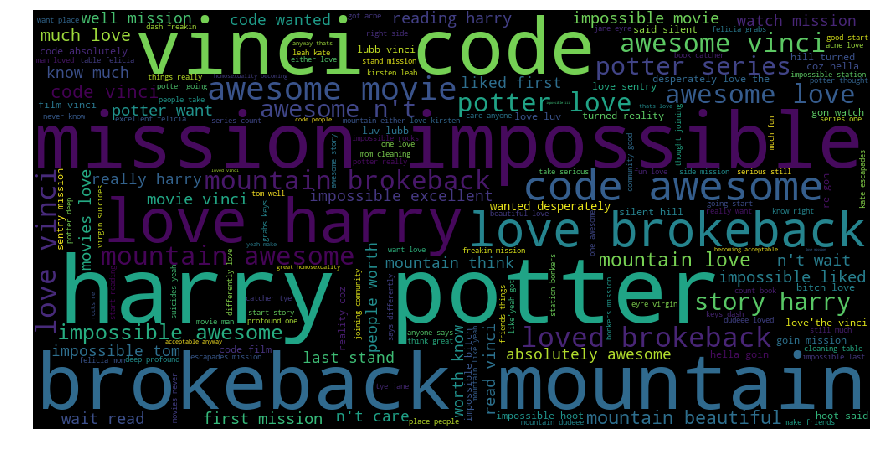

In [18]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_positivas_juntas = ' '.join(palabras_positivas_filtradas)

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_positivas_juntas)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de sentimientos negativos

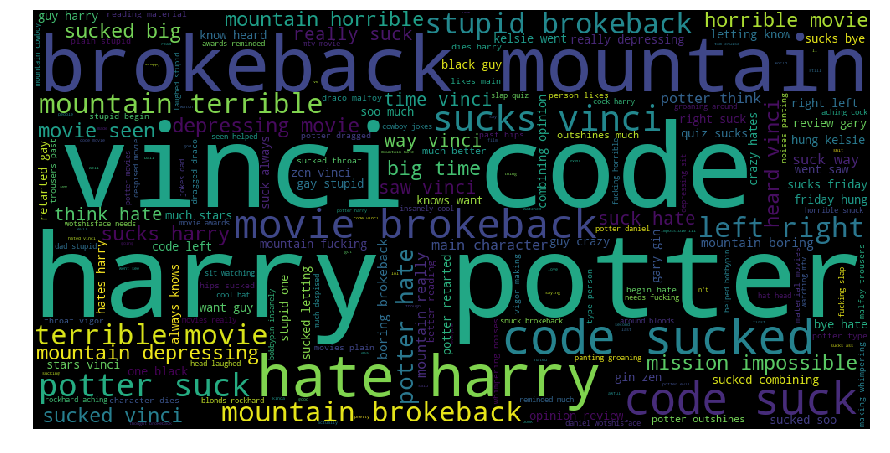

In [19]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_negativas_juntas = ' '.join(palabras_negativas_filtradas)

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_negativas_juntas)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de ambos sentimientos

In [20]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_positivas_negativas_juntas = palabras_positivas_juntas + palabras_negativas_juntas

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_positivas_negativas_juntas)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* ¿Qué te parecen los resultados?
* ¿Qué crees que se podría mejorar?

## Análisis de frecuencias de reviews negativos y positivos
A partir de las palabras filtradas queremos el conjunto de palabras que nos muestre cuales son las palabras más probables en cada categoría (reviews positivo o negativo).

In [21]:
def calcula_palabras_mas_probables(palabras, n):
    '''
    Devuelve un conjunto con las n palabras más probables
    '''
    conjunto = set()
    # IMPLEMENTA AQUÍ TU CÓDIGO
    fdist = FreqDist(palabras)
    conjunto=fdist.most_common(n)
    return conjunto

In [22]:
conjunto_positivas = calcula_palabras_mas_probables(palabras_positivas_filtradas, 150)  

print("conjunto_positivas: " + str(len(conjunto_positivas)))
print(conjunto_positivas)

conjunto_positivas: 150
[('love', 1534), ('awesome', 1124), ('potter', 1086), ('harry', 1085), ('vinci', 1000), ('brokeback', 999), ('impossible', 998), ('mission', 997), ('code', 996), ('mountain', 994), ('like', 871), ('loved', 256), ('movie', 228), ('movies', 192), ('much', 188), ("n't", 187), ('really', 186), ('one', 181), ('series', 177), ('know', 175), ('want', 172), ('would', 172), ('people', 167), ('story', 166), ('start', 161), ('felicia', 160), ('beautiful', 127), ('book', 125), ('good', 111), ('read', 101), ('also', 100), ('liked', 99), ('first', 97), ('reading', 95), ('tom', 95), ('absolutely', 93), ('great', 92), ('got', 92), ('well', 91), ('still', 90), ('think', 90), ('film', 89), ('thought', 88), ('wait', 88), ('last', 87), ('yeah', 86), ('excellent', 86), ('right', 86), ('watch', 86), ('going', 86), ('rocks', 85), ("'re", 84), ('things', 84), ('friends', 84), ('never', 84), ('side', 83), ('mom', 83), ('make', 83), ('luv', 82), ('worth', 82), ('said', 82), ('community',

In [23]:
conjunto_negativas = calcula_palabras_mas_probables(palabras_negativas_filtradas, 150)    
    
print("conjunto_negativas: " + str(len(conjunto_negativas)))
print(conjunto_negativas)

conjunto_negativas: 150
[('potter', 1007), ('harry', 1003), ('vinci', 1001), ('mountain', 1000), ('code', 998), ('brokeback', 997), ('sucks', 601), ('sucked', 595), ('hate', 571), ('movie', 555), ('stupid', 365), ('suck', 276), ('much', 264), ('really', 188), ('depressing', 188), ('horrible', 181), ('terrible', 174), ('movies', 174), ('fucking', 169), ('right', 163), ('guy', 162), ('left', 161), ('think', 112), ('one', 102), ('know', 101), ('heard', 95), ('time', 93), ('mission', 93), ('impossible', 93), ('boring', 92), ('went', 90), ('ever', 89), ('way', 89), ('seen', 89), ('saw', 88), ('gay', 88), ('big', 87), ('person', 85), ('cock', 85), ('reading', 84), ('making', 84), ('watching', 83), ('around', 83), ('cool', 82), ('friday', 82), ('knows', 82), ('hates', 82), ('review', 82), ('opinion', 82), ('better', 82), ('want', 82), ('dad', 81), ('past', 81), ('needs', 81), ('character', 81), ('always', 81), ('main', 81), ('head', 81), ('jokes', 81), ('hung', 80), ('kelsie', 80), ('combinin

### ¿Se te ocurre cómo mejorarlo?
Como ves existen muchas palabras parecidas, o directamente las mismas, ¿se te ocurre cómo podríamos mejorarlo?. Por ejemplo, podríamos eliminar esas palabras comunes de ambos conjuntos, ya que no aportan nada.

In [24]:
comunes = {} # IMPLEMENTA AQUÍ TU CÓDIGO
comunes = set(palabras_negativas_filtradas) & set(palabras_positivas_filtradas)
comunes = list(comunes)
print(comunes)

['news', 'probably', 'carefully', 'day', 'two', 'fun', 'play', 'book', 'finally', 'hat', 'catch', 'good', 'rent', 'especially', 'potter', 'miss', 'get', 'rings', 'level', 'every', 'showing', 'nc17', 'mentioned', 'enjoyed', 'daniel', 'although', 'sad', 'came', 'character', 'looks', 'going', 'bought', 'understand', 'even', 'films', 'kind', 'fanfic', 'want', 'kids', 'times', 'seen', 'interesting', 'things', 'shoes', 'might', 'theater', 'music', 'crash', 'whatever', 'religious', 'hate', 'everything', 'pretty', 'always', 'wanted', 'mention', 'damn', 'anyway', 'begin', 'none', 'becoming', 'sexy', 'saturday', 'looking', 'great', 'scene', 'cuz', 'nothing', 'hell', 'oscar', 'mountain', 'ass', 'half', 'anyways', 'would', 'hands', 'watching', 'anyone', 'think', 'emma', 'suppose', 'sick', 'sing', 'asleep', 'worth', 'vinci', 'ever', 'type', 'someone', 'critics', 'recently', 'rest', 'big', 'little', "y'all", 'decided', 'college', 'books', 'friend', 'taking', 'thinking', 'classes', 'still', 'code', '

Una vez tenemos las palabras comunes, podemos aplicarlo a los conjuntos tal y como hemos hecho con el resto de transformaciones.

In [25]:
def quitar_comunes(words, comunes):
    out = []
    # IMPLEMENTA AQUÍ TU CÓDIGO
    for w in words:
        if w[0] in comunes:
            pass
        else:
            out.append(w)
    
    return out

In [26]:
conjunto_positivas_filtradas = quitar_comunes(conjunto_positivas, comunes)
print("conjunto_positivas_filtradas: ", str(conjunto_positivas_filtradas))

conjunto_positivas_filtradas:  [('loved', 256), ('series', 177), ('start', 161), ('felicia', 160), ('beautiful', 127), ('wait', 88), ('excellent', 86), ('rocks', 85), ('mom', 83), ('luv', 82), ('community', 82), ('place', 82), ('stand', 81), ('turned', 81), ('bitch', 81), ('acceptable', 81), ('desperately', 80), ("love'the", 80), ('lubb', 80), ('hoot', 80), ('silent', 80), ('hill', 80), ('coz', 80), ('hella', 80), ('goin', 80), ('sentry', 80), ('station', 80), ('bonkers', 80), ('cleaning', 80), ('grabs', 80), ('keys', 80), ('dash', 80), ('kirsten', 80), ('leah', 80), ('kate', 80), ('escapades', 80), ('joining', 80), ('deep', 80), ('profound', 80), ('differently', 80), ('serious', 80), ('count', 80), ('catcher', 80), ('tye', 80), ('jane', 80), ('eyre', 80), ('virgin', 80), ('suicides', 80), ("like'yeah", 80), ('acne', 80), ('dudeee', 80), ('homosexuality', 80), ('amazing', 16), ('tell', 9)]


In [27]:
conjunto_negativas_filtradas = quitar_comunes(conjunto_negativas, comunes)
print("conjunto_negativas_filtradas: ", str(conjunto_negativas_filtradas))

conjunto_negativas_filtradas:  [('sucks', 601), ('stupid', 365), ('suck', 276), ('depressing', 188), ('horrible', 181), ('terrible', 174), ('boring', 92), ('cock', 85), ('hates', 82), ('review', 82), ('past', 81), ('needs', 81), ('head', 81), ('jokes', 81), ('hung', 80), ('kelsie', 80), ('combining', 80), ('gary', 80), ('gin', 80), ('zen', 80), ('letting', 80), ('stars', 80), ('quiz', 80), ('bye', 80), ('retarted', 80), ('black', 80), ('outshines', 80), ('material', 80), ('plain', 80), ('likes', 80), ('dragged', 80), ('draco', 80), ('malfoy', 80), ('trousers', 80), ('hips', 80), ('throat', 80), ('vigor', 80), ('whimpering', 80), ('noises', 80), ('panting', 80), ('groaning', 80), ('blonds', 80), ('rockhard', 80), ('aching', 80), ('wotshisface', 80), ('slap', 80), ('helped', 80), ('bobbypin', 80), ('insanely', 80), ('laughed', 80), ('sit', 80), ('mtv', 80), ('reminded', 80), ('despised', 80), ('hated', 38), ('balls', 14), ('awful', 13)]


###  Punto extra: histogramas

Construye histogramas para cada uno de los casos anteriores y compara si tiene sentido lo que se muestra.

In [28]:
# IMPLEMENTA AQUÍ TU CÓDIGO
most_common = pd.DataFrame(conjunto_negativas_filtradas).rename(columns = {0 : "word", 1 : "count"})
most_common.sort_values(by = "count", ascending = False)[:40].plot(x = "word", y = "count", kind="bar", color='red')

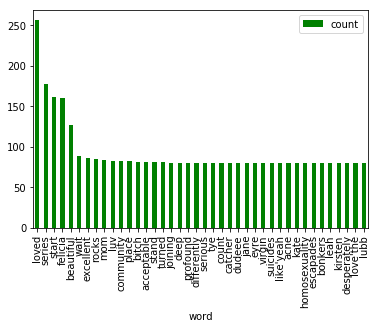

In [29]:
most_common = pd.DataFrame(conjunto_positivas_filtradas).rename(columns = {0 : "word", 1 : "count"})
most_common.sort_values(by = "count", ascending = False)[:40].plot(x = "word", y = "count", kind="bar", color='green')

## Conclusiones

* ¿Qué otras técnicas habrías aplicado?
* ¿Cuál crees que sería el siguiente paso?